In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from collections import Counter
from sklearn import metrics 
%matplotlib inline

/home/gojo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### prepare the data 

In [2]:
df=pd.read_csv("./heart.csv")
df.drop_duplicates(inplace=True)


In [3]:
X=df.drop("target",axis=1)
y=df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


In [4]:
#test if the data is splitted correctly
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({1: 128, 0: 113})

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### logistic regression

In [6]:
from sklearn.linear_model import LogisticRegression
logosticregression=LogisticRegression(max_iter=3000)
logosticregression.fit(X_train,y_train)
print(logosticregression.predict(X_test[0].reshape(1,-1)))

[1]


In [12]:
logosticregression.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [13]:
score=logosticregression.score(X_test,y_test)
print(score)

0.8360655737704918


In [14]:
prediction=logosticregression.predict(X_test)
cm=metrics.confusion_matrix(y_test,prediction)
print(cm)

[[20  5]
 [ 5 31]]


Text(0.5, 1.0, 'actual score:0.8360655737704918')

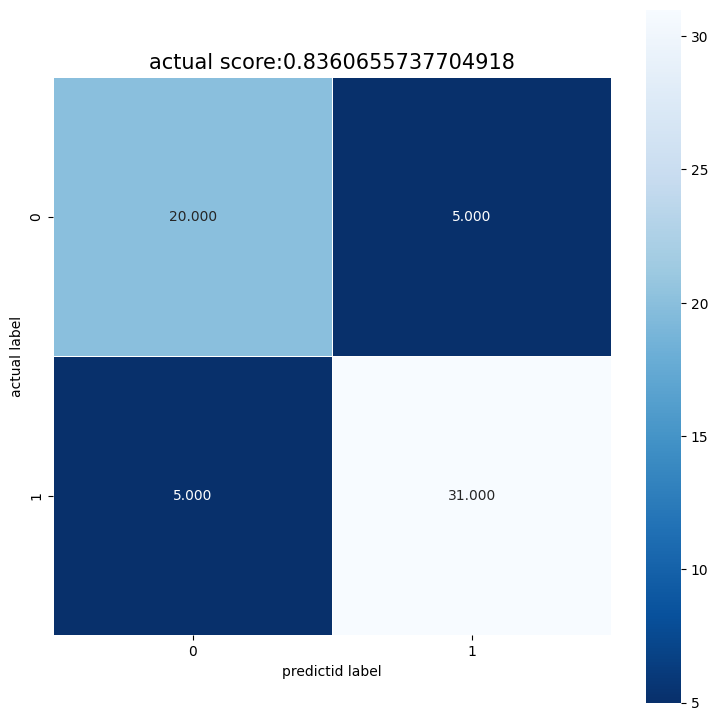

In [15]:
plt.figure(figsize=(9,9));
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=0.5,square=True,cmap="Blues_r")
plt.ylabel("actual label")
plt.xlabel("predictid label")
all_sample_title="actual score:{0}".format(score)
plt.title(all_sample_title,size=15)